<a href="https://colab.research.google.com/github/shruthymenon/Customer-Conversion-Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**


You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 

#**Features: **

age (numeric)

job : type of job

marital : marital status

educational_qual : education status

call_type : contact communication type

day: last contact day of the month (numeric)

mon: last contact month of year

dur: last contact duration, in seconds (numeric)

num_calls: number of contacts performed during this campaign and for this client 

prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
y - has the client subscribed to the insurance?



In [170]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import warnings for ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [171]:
df=pd.read_csv('trains.csv') #reading the csv file

In [172]:
df.head() #to see the first 5 rows

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [173]:
df.shape # 327723 rows and 11 columns

(45211, 11)

In [174]:
#describing the data
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [175]:
df.y=df.y.map({'yes':1,'no':0})
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


#**Checking Balanced or Imbalanced**

Class 0: 39922
Class 1: 5289
Proportion of class 0 is  88.3 %


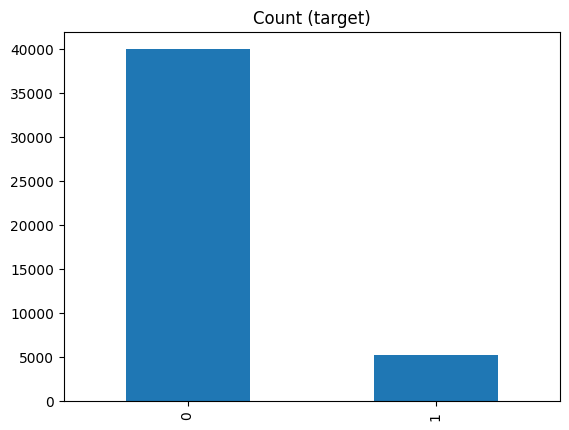

In [176]:
target_count = df.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

#**Data cleaning`**

#**Null values**

In [177]:
df.isnull().sum() # no null values

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

#**Duplicates**

In [178]:
df=df.drop_duplicates()
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


#**Type of data**

In [179]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

#**Checking for unique values**

In [180]:
#unique_values
print(df['job'].unique())
print(df['marital'].unique())
print(df['education_qual'].unique())
print(df['call_type'].unique())
print(df['mon'].unique())
print(df['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[0 1]


In [181]:
df.describe()


,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


#**Outliers**

In [182]:
#checking for outliers
#age column
q3 = df.age.quantile(0.75)
q1=df.age.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)
#df.age=df.age.clip(upper_threshold,lower_threshold)
df.describe()

upper_threshold: 70.5 lower_threshold: 10.5


,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


In [183]:
#day column
q3 = df['day'].quantile(0.75) 
q1=  df['day'].quantile(0.25)
iqr=q3-q1
upper_threshold = df['day'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['day'].quantile(0.25) - (1.5 * iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)

upper_threshold: 40.5 lower_threshold: -11.5


In [184]:
#dur column
q3 = df.dur.quantile(0.75)
q1=df.dur.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)
df.dur=df.dur.clip(upper_threshold,lower_threshold)
df.describe()

upper_threshold: 643.0 lower_threshold: -221.0


,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,234.95620,2.763898,0.117000
std,10.619130,8.32234,176.75476,3.098189,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,95.000000,31.00000,643.00000,63.000000,1.000000


In [185]:
#num_calls column
q3 = df.num_calls.quantile(0.75)
q1=df.num_calls.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
print("upper_threshold:", upper_threshold,"lower_threshold:", lower_threshold)
df.num_calls=df.num_calls.clip(upper_threshold,lower_threshold)
df.describe()

upper_threshold: 6.0 lower_threshold: -2.0


,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235,0.117000
std,10.619130,8.32234,176.75476,1.600152,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,95.000000,31.00000,643.00000,6.000000,1.000000


#EDA

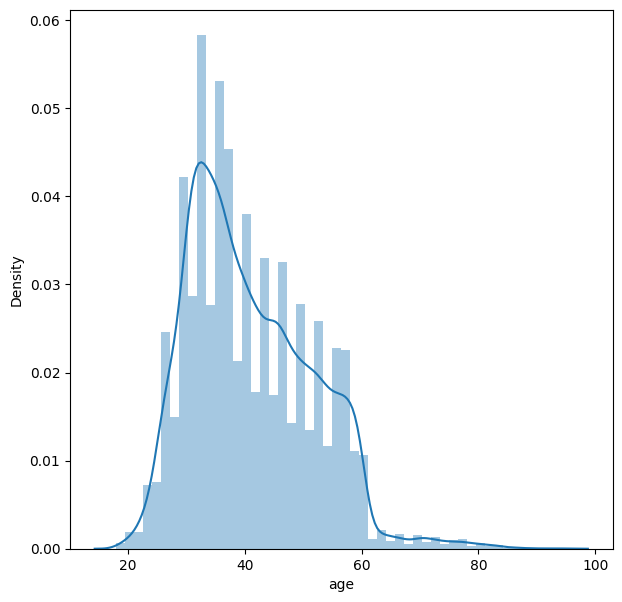

In [186]:
#univariant analysis
# Distribution of age column
plt.figure(figsize=(7,7))
sns.distplot(df.age)
plt.show()

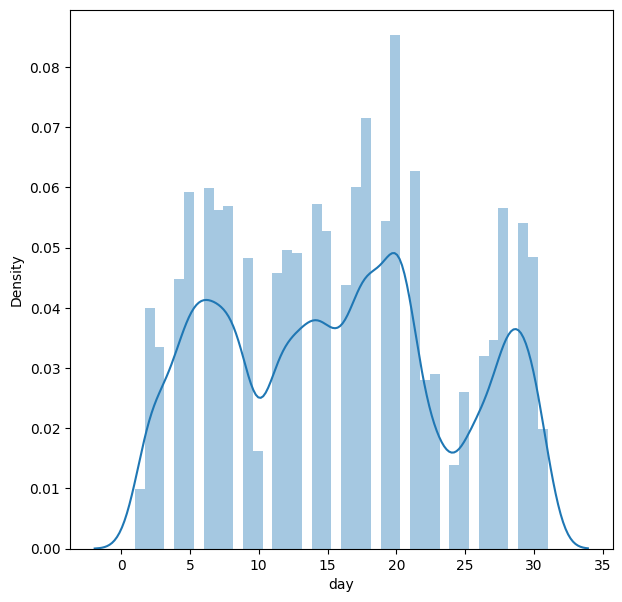

In [187]:
# Distribution of day column
plt.figure(figsize=(7,7))
sns.distplot(df.day)
plt.show()


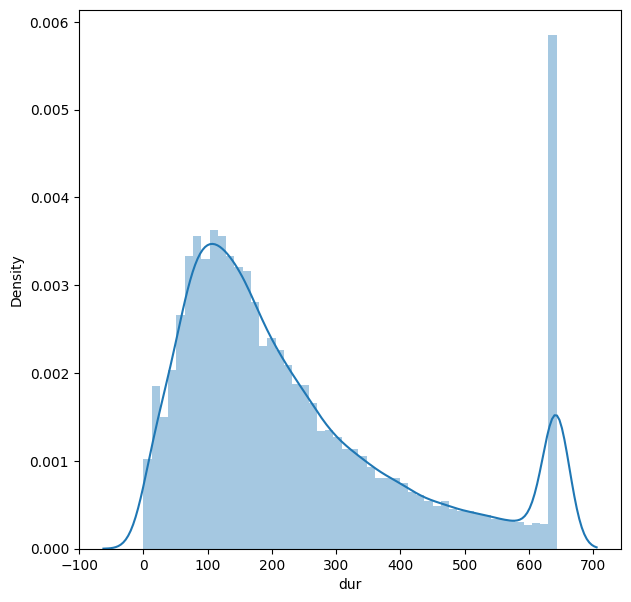

In [188]:
# Distribution of dur column
plt.figure(figsize=(7,7))
sns.distplot(df.dur)
plt.show()


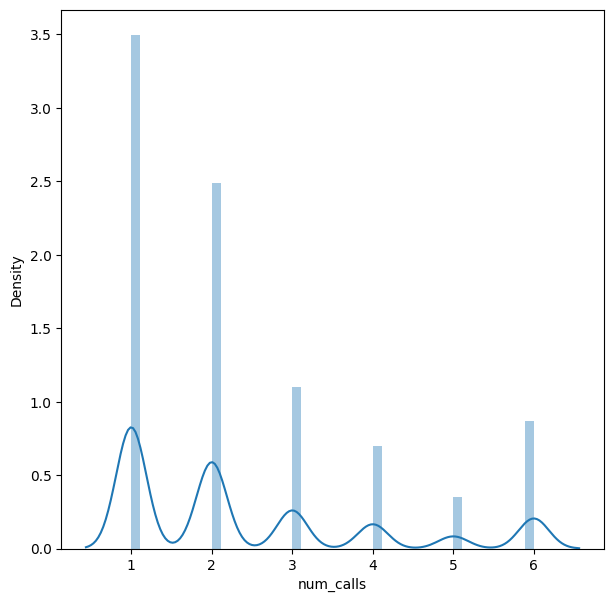

In [189]:
# Distribution of num_calls column
plt.figure(figsize=(7,7))
sns.distplot(df.num_calls)
plt.show()


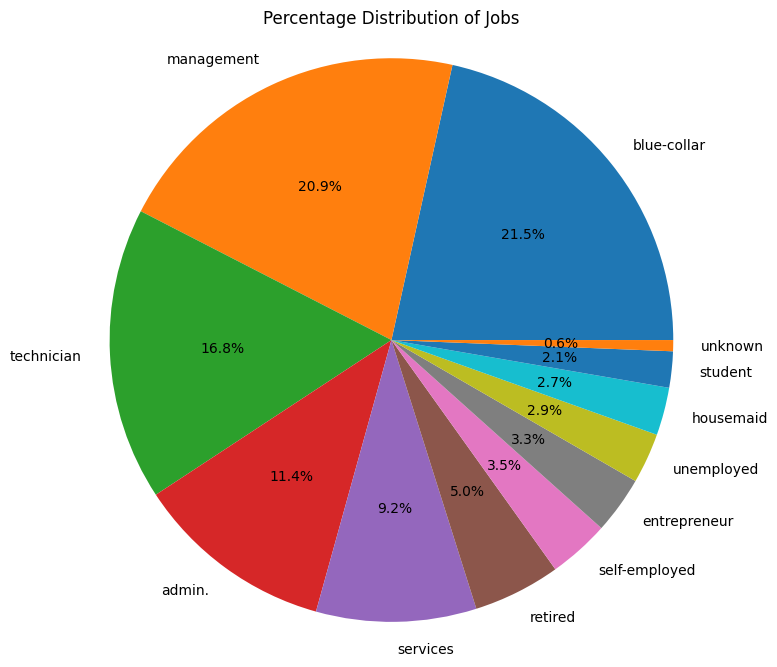

In [190]:
#Distribution of job column
# Get the value counts for the 'job' column of your DataFrame
job_counts = df['job'].value_counts()

# Create a new DataFrame with the value counts and index (job titles)
job_df = pd.DataFrame({'job_title': job_counts.index, 'count': job_counts.values})

# Set the figure size and plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_df['count'], labels=job_df['job_title'], autopct='%1.1f%%')
plt.title('Percentage Distribution of Jobs')
plt.axis('equal')

# Display the pie chart
plt.show()


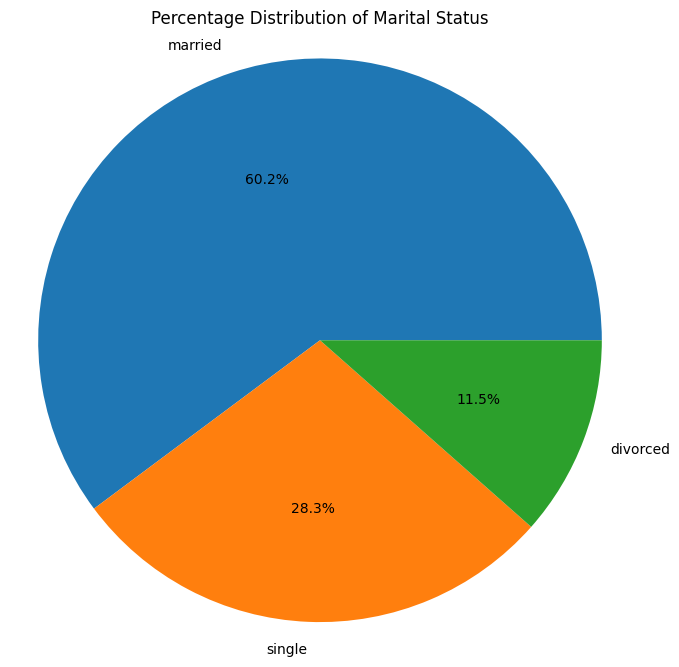

In [191]:
import matplotlib.pyplot as plt

# Get the value counts for the 'marital' column of your DataFrame
marital_counts = df['marital'].value_counts()

# Create a new DataFrame with the value counts and index (marital status)
marital_df = pd.DataFrame({'marital_status': marital_counts.index, 'count': marital_counts.values})

# Set the figure size and plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_df['count'], labels=marital_df['marital_status'], autopct='%1.1f%%')
plt.title('Percentage Distribution of Marital Status')
plt.axis('equal')

# Display the pie chart
plt.show()



In [192]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92.0,1.0,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198.0,1.0,unknown,0


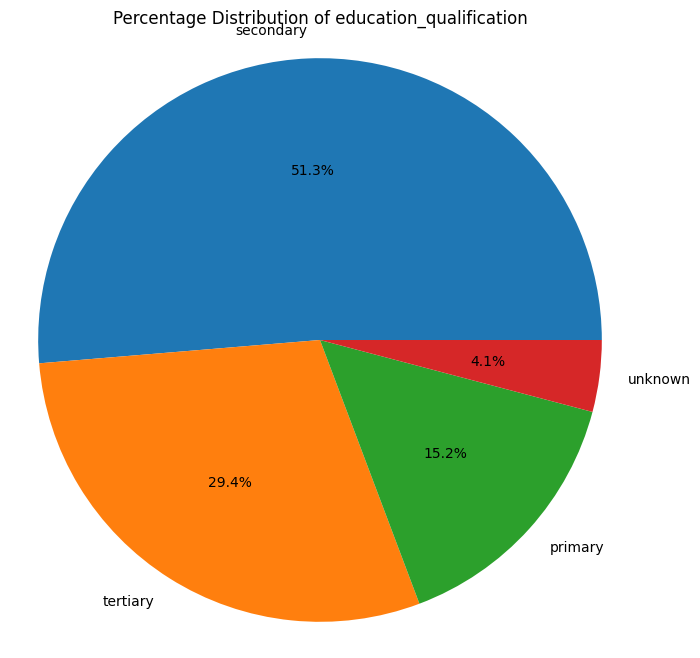

In [193]:
import matplotlib.pyplot as plt

# Get the value counts for the 'marital' column of your DataFrame
education_counts = df['education_qual'].value_counts()

# Create a new DataFrame with the value counts and index (marital status)
education_df = pd.DataFrame({'education_qual': education_counts.index, 'count': education_counts.values})

# Set the figure size and plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_df['count'], labels=education_df['education_qual'], autopct='%1.1f%%')
plt.title('Percentage Distribution of education_qualification')
plt.axis('equal')

# Display the pie chart
plt.show()

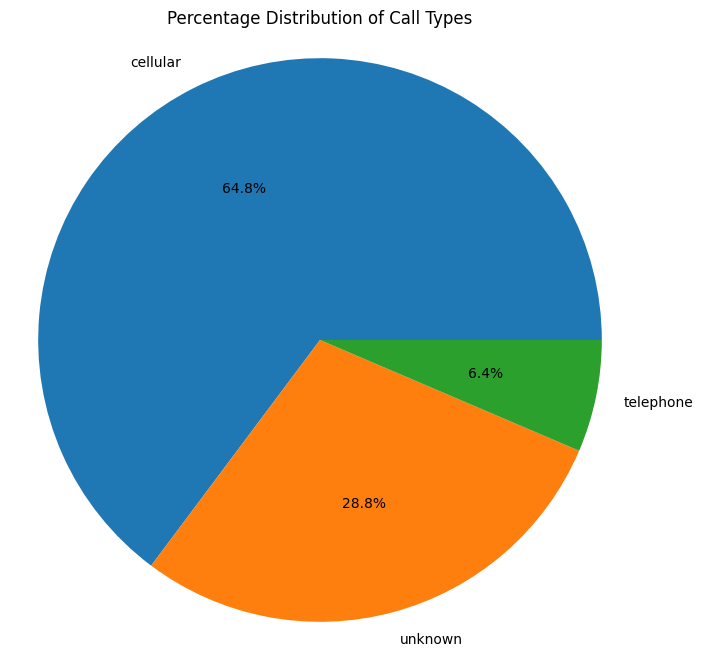

In [194]:
#call_type
import matplotlib.pyplot as plt

# Get the value counts for the 'call_type' column of your DataFrame
call_type_counts = df['call_type'].value_counts()

# Create a new DataFrame with the value counts and index (call types)
call_type_df = pd.DataFrame({'call_type': call_type_counts.index, 'count': call_type_counts.values})

# Set the figure size and plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(call_type_df['count'], labels=call_type_df['call_type'], autopct='%1.1f%%')
plt.title('Percentage Distribution of Call Types')
plt.axis('equal')

# Display the pie chart
plt.show()


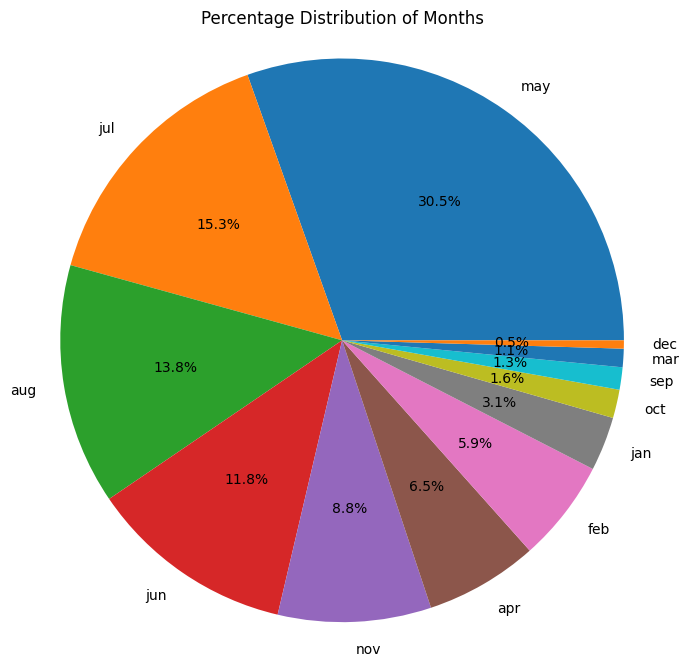

In [195]:
#months
import matplotlib.pyplot as plt

# Get the value counts for the 'mon' column of your DataFrame
month_counts = df['mon'].value_counts()

# Create a new DataFrame with the value counts and index (months)
month_df = pd.DataFrame({'month': month_counts.index, 'count': month_counts.values})

# Set the figure size and plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(month_df['count'], labels=month_df['month'], autopct='%1.1f%%')
plt.title('Percentage Distribution of Months')
plt.axis('equal')

# Display the pie chart
plt.show()


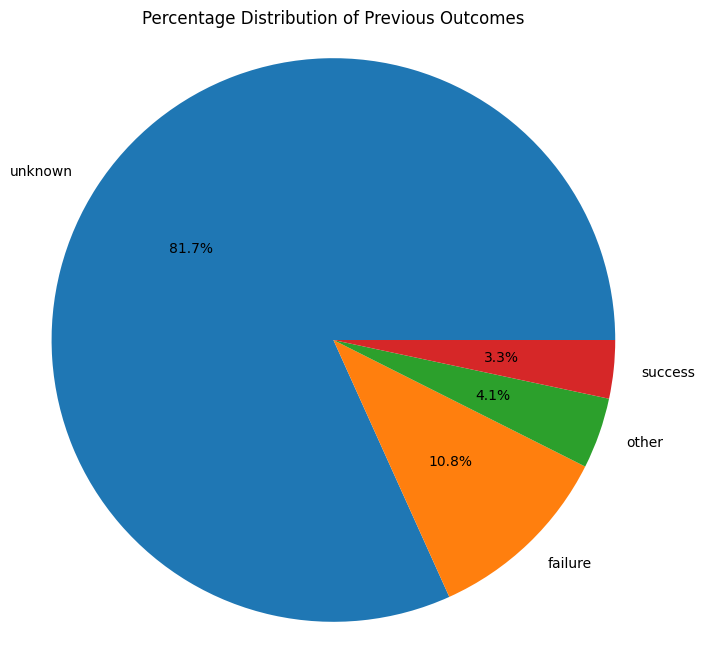

In [196]:
#prev_outcomes
import matplotlib.pyplot as plt

# Get the value counts for the 'prev_outcome' column of your DataFrame
prev_outcome_counts = df['prev_outcome'].value_counts()

# Create a new DataFrame with the value counts and index (previous outcomes)
prev_outcome_df = pd.DataFrame({'prev_outcome': prev_outcome_counts.index, 'count': prev_outcome_counts.values})

# Set the figure size and plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(prev_outcome_df['count'], labels=prev_outcome_df['prev_outcome'], autopct='%1.1f%%')
plt.title('Percentage Distribution of Previous Outcomes')
plt.axis('equal')

# Display the pie chart
plt.show()


#**Interpretation**

1.  AGE

*   Company targets more of people of age 30 -40 to sell their insurance plan
*   People aged less than 25 years and more than 60 years are less targeted by  the company for insurance



2. DAY

*   Most number of calls are between in the mid of month



3. Duration

*   Maximum number of calls lasted less than 1000 seconds




4. Number of Calls


* Most People are contacted only 1 or 2 times by the company



5. JOB


*  Blue collar and management people are targeted most by insurance company
*  Students are least targeted for insurance plan


6. MARITAL STATUS

*  Married people are targeted the most and divorced people are least targeted

7. EDUCATIONAL QUALIFICATION


*  Secondary qualified people have been targeted the most for insurance followed by tertiary and primary


8. CALL_TYPE


*  Cellur mode is most used for contacting the people for campaign

9. Month


*  May month is when maxmium calls are generated for new insurance customers,december is the least no of calls placed by the company


10. Previous Outcome

*  More unknown as status than failure and success







#The missing values in some columns have been represented as unknown. Unknown represents missing data.

In [197]:
cate_var=['job','education_qual']
for column in cate_var:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

#**FEATURE VS TARGET VARIABLE**

In [198]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,0


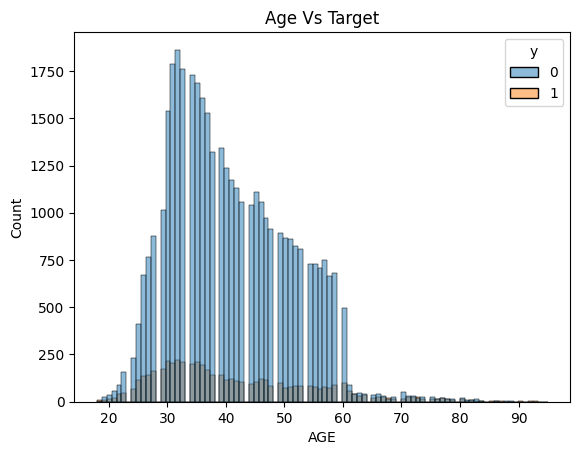

In [199]:
#age vs y (numerical data)
sns.histplot(x='age',hue='y',data=df)
plt.title("Age Vs Target",)
plt.xlabel("AGE")
plt.show()

Middle Age peoples insured more than the young and aged ones.

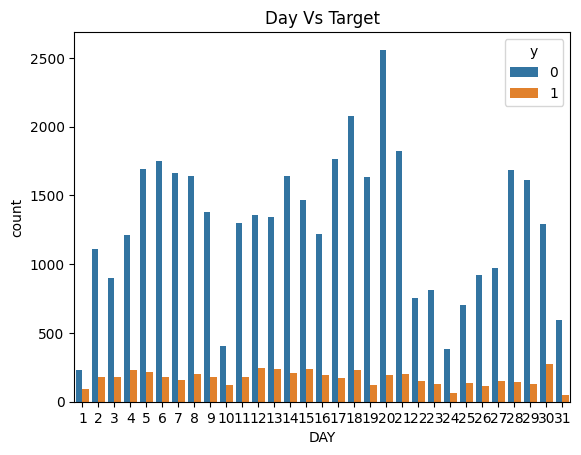

In [200]:
sns.countplot(x='day',hue='y',data=df) #(numerical)
plt.title("Day Vs Target")
plt.xlabel("DAY")
plt.show()

Mid of the month has the highest target variable 

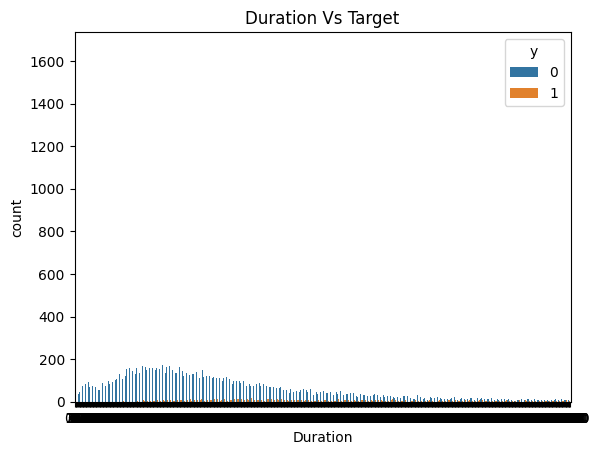

In [201]:
sns.countplot(x='dur',hue='y',data=df) #numerical
plt.title("Duration Vs Target")
plt.xlabel("Duration")
plt.show()

Duration of the call plays a major role in subcription.

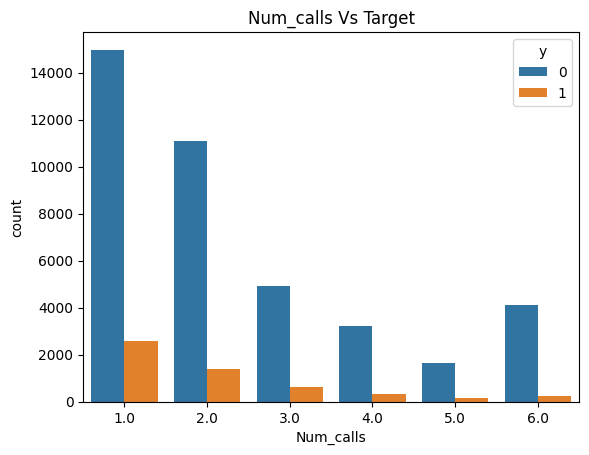

In [202]:
sns.countplot(x='num_calls',hue='y',data=df) #numerical
plt.title("Num_calls Vs Target")
plt.xlabel("Num_calls")
plt.show()

<Axes: xlabel='job'>

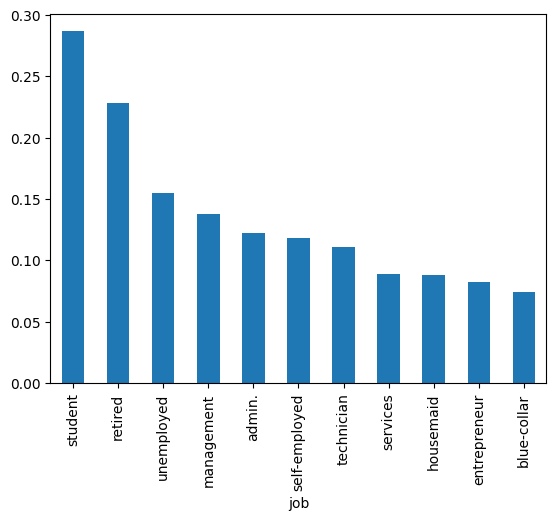

In [203]:
df.groupby('job')['y'].mean().sort_values(ascending=False).plot(kind='bar')  #categorical

FROM JOB VS TARGET , 

We got that student are targeted to subcribe the insurance more than others and then, the RETIRED people are targeted more.

<Axes: xlabel='marital'>

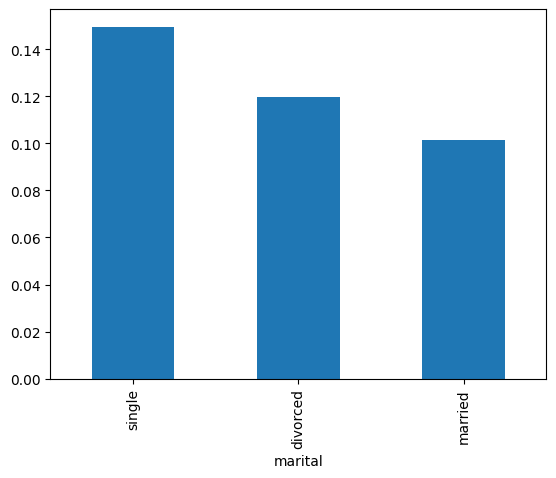

In [204]:
df.groupby('marital')['y'].mean().sort_values(ascending=False).plot(kind='bar')

 We got SINGLE people targeted more to subscribe the insurance more than others.

<Axes: xlabel='education_qual'>

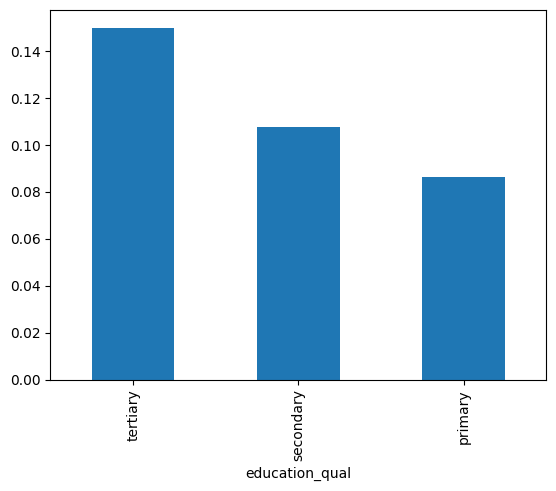

In [205]:
df.groupby('education_qual')['y'].mean().sort_values(ascending=False).plot(kind='bar') #categorical

We got TERTIARY people interested more to subscribe the insurance more than others.

<Axes: xlabel='call_type'>

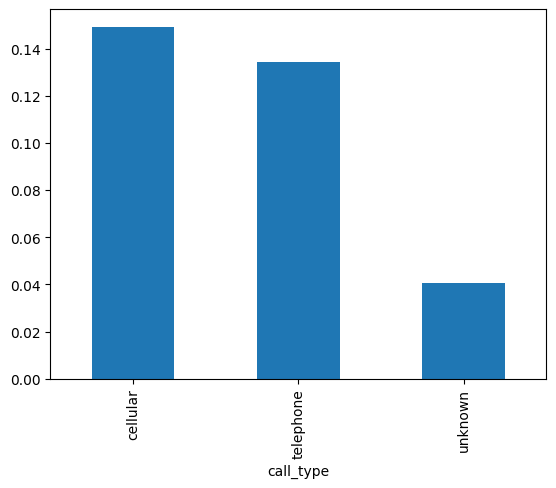

In [206]:
df.groupby('call_type')['y'].mean().sort_values(ascending=False).plot(kind='bar')

We got CELLULAR people interested more to subscribe the insurance more than others.

<Axes: xlabel='mon'>

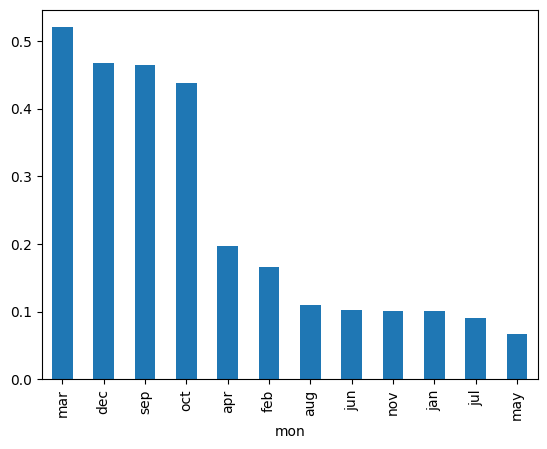

In [207]:
df.groupby('mon')['y'].mean().sort_values(ascending=False).plot(kind='bar')

We got MAR month scored much amount to subscribe the insurance more than others. Because, the trend during the month of MARCH is high, as march being the end of financial year in INDIA and the month of DECEMBER is the second highest one as being the financial year in ABROADS.

<Axes: xlabel='prev_outcome'>

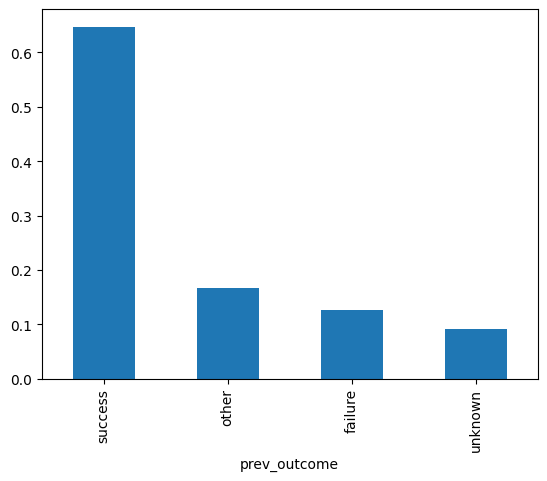

In [208]:
df.groupby('prev_outcome')['y'].mean().sort_values(ascending=False).plot(kind='bar')

We got SUCCESS people interested more to subscribe the insurance more than others.

#**ENCODING THE DATA**

In [209]:
df['job']=df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})
df['education_qual']=df['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
df['call_type']=df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon']=df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})
df['marital'] = df['marital'].map({'married':1,'single':2,'divorced':3})
df['prev_outcome']=df['prev_outcome'].map({'unknown':1,'failure':2,'other':3,'success':4})


#TARGET AND FEATURE SELECTION

In [210]:
X = df[['age', 'job', 'education_qual', 'call_type', 'day',
       'dur', 'num_calls','marital','prev_outcome','mon']].values
y = df['y'].values

#SPLITTING

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)


#SMOTEENN

In [212]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_train, y_train = smt.fit_resample(X_train, y_train) 

#SCALE

In [213]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**Models**

#Logistic Regression

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score

logistic = LogisticRegression()
logistic.fit(X_train,y_train)
logistic.score(X_train,y_train)
y_pred = logistic.predict(X_test)
print("Training Accuracy :",logistic.score(X_train,y_train))
print("Testing Accuracy :",logistic.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.8772354762338372
Testing Accuracy : 0.7376396416325628
F1 Score : 0.43711438063597524
ROC AUC Score : 0.7898633209445424


#Decision Tree

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train, y_train) 
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
    dt = DecisionTreeClassifier(max_depth=depth) 
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    roc = roc_auc_score(y_test,y_pred)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy,"ROC AUC Score :", roc, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7808960116554362 ROC AUC Score : 0.721651868424303  Cross val score :  0.7807503187033327
Depth  :  2  Training Accuracy :  0.8327444909852486 ROC AUC Score : 0.7511413314020293  Cross val score :  0.8325987980331451
Depth  :  3  Training Accuracy :  0.8724640320524495 ROC AUC Score : 0.7890730559703866  Cross val score :  0.8713349116736477
Depth  :  4  Training Accuracy :  0.8809688581314878 ROC AUC Score : 0.7923651736489294  Cross val score :  0.8785102895647423
Depth  :  5  Training Accuracy :  0.9168639592059734 ROC AUC Score : 0.8108698189776815  Cross val score :  0.9144053906392278
Depth  :  6  Training Accuracy :  0.9238936441449644 ROC AUC Score : 0.8171321118584309  Cross val score :  0.9191950464396286
Depth  :  7  Training Accuracy :  0.9360225824075761 ROC AUC Score : 0.8228029779883748  Cross val score :  0.9308869058459297
Depth  :  8  Training Accuracy :  0.9450555454379894 ROC AUC Score : 0.8202546322288221  Cross val score :  0.93

In [216]:
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9991622655254052
Testing Accuracy : 0.8534454153301626
F1 Score : 0.5404092958723552
ROC AUC Score : 0.798304646825887


#Feature Importance

In [220]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# assuming X_test is a numpy array
X_test_df = pd.DataFrame(X_test, columns=['age','job','marital','education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome'])

dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train, y_train)

importance = dt.feature_importances_
feature_importances = list(zip(X_test_df.columns, importance))
feature_importances.sort(key=lambda x: x[1], reverse=True)
print("Feature Importances in Descending Order:")
for feature, importance in feature_importances:
    print(feature, ":", importance)


Feature Importances in Descending Order:
day : 0.45812809792615006
prev_outcome : 0.18308371899686313
num_calls : 0.11049951179717539
education_qual : 0.0784740944204131
call_type : 0.05582820850128473
age : 0.036559849785844256
job : 0.031014063232142695
mon : 0.016799574426799652
marital : 0.014902802771815504
dur : 0.014710078141511464


#K-Nearest NEIGHBOUR

In [60]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_train, y_train) 
  print("K value  : " , i, " Train score : ", knn.score(X_train,y_train) , " Cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) 

K value  :  1  Train score :  1.0  Cross val score :  0.9952856086096462
K value  :  2  Train score :  0.9999266243533771  Cross val score :  0.9955424220289532
K value  :  3  Train score :  0.9968265032835602  Cross val score :  0.9863337015844353
K value  :  4  Train score :  0.9968998789301831  Cross val score :  0.987471060456844
K value  :  5  Train score :  0.990516197673992  Cross val score :  0.9751439826814308
K value  :  6  Train score :  0.9911582345819423  Cross val score :  0.9767582240390711
K value  :  7  Train score :  0.982811754778589  Cross val score :  0.9650732000011306
K value  :  8  Train score :  0.983600542979785  Cross val score :  0.9676230259499929
K value  :  9  Train score :  0.9740983967421213  Cross val score :  0.9574605203458061
K value  :  10  Train score :  0.9758043805261034  Cross val score :  0.9598269105414973
K value  :  20  Train score :  0.948233481307554  Cross val score :  0.936566765768745
K value  :  30  Train score :  0.932365997725355  C

In [61]:
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Training Accuracy :",knn.score(X_train,y_train))
print("Testing Accuracy :",knn.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9968998789301831
Testing Accuracy : 0.7807764627806658
F1 Score : 0.4420045045045045
ROC AUC Score : 0.7594966305108598


#XG_BOOST

In [62]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = i, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", i, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.9443262281248853  Cross-Val score :  0.9395761518648162
Learning rate :  0.02  Train score :  0.9529478666030744  Cross-Val score :  0.9479044244373908
Learning rate :  0.03  Train score :  0.9607256851451004  Cross-Val score :  0.9553156225550031
Learning rate :  0.04  Train score :  0.9652199435007521  Cross-Val score :  0.958140886464928
Learning rate :  0.05  Train score :  0.9688703819202407  Cross-Val score :  0.9606908099949486
Learning rate :  0.06  Train score :  0.9716586564919103  Cross-Val score :  0.962653752574292
Learning rate :  0.07  Train score :  0.9733462963642368  Cross-Val score :  0.9636811105624133
Learning rate :  0.08  Train score :  0.974978904501596  Cross-Val score :  0.964011389134412
Learning rate :  0.09  Train score :  0.9764647613457094  Cross-Val score :  0.9647819236086239
Learning rate :  0.1  Train score :  0.9781890890413472  Cross-Val score :  0.9650020868908395
Learning rate :  0.11  Train score :  0.97892

In [221]:
xg = XGBClassifier(learning_rate = 0.15, n_estimators=100, verbosity = 0)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
print("Training Accuracy :",xg.score(X_train,y_train))
print("Testing Accuracy :",xg.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.9819704971771991
Testing Accuracy : 0.8812078309921468
F1 Score : 0.6077428780131483
ROC AUC Score : 0.8354264565250751


#**Random Forest**

In [229]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

In [223]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9991622655254052  Cross val score :  0.8314878892733564
Depth  :  2  Training Accuracy :  0.9991622655254052  Cross val score :  0.8753778910945182
Depth  :  3  Training Accuracy :  0.9991622655254052  Cross val score :  0.9006374066654524
Depth  :  4  Training Accuracy :  0.9991622655254052  Cross val score :  0.9213258058641414
Depth  :  5  Training Accuracy :  0.9991622655254052  Cross val score :  0.9335458022218177
Depth  :  6  Training Accuracy :  0.9991622655254052  Cross val score :  0.9418685121107266
Depth  :  7  Training Accuracy :  0.9991622655254052  Cross val score :  0.948260790384265
Depth  :  8  Training Accuracy :  0.9991622655254052  Cross val score :  0.9522855581861229
Depth  :  9  Training Accuracy :  0.9991622655254052  Cross val score :  0.9572755417956657
Depth  :  10  Training Accuracy :  0.9991622655254052  Cross val score :  0.9604443635039154


In [225]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 10, max_features='sqrt')
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("Training Accuracy :",rf.score(X_train,y_train))
print("Testing Accuracy :",rf.score(X_test,y_test))
print("F1 Score :", f1_score(y_test,predictions))
print("ROC AUC Score :", roc_auc_score(y_test,predictions))


Training Accuracy : 0.9695501730103806
Testing Accuracy : 0.8440438004645504
F1 Score : 0.5566037735849056
ROC AUC Score : 0.8357134268668336


#**Conclusion**

**Logistic Regression => 0.7898633209445424**

**KNN Classifier =>  0.7594966305108598**

**Decision Tree => 0.798304646825887**

**XG Boost => 0.8354264565250751**

**Random Forest =>0.8357134268668336**

Random Forest is the best model for customer convertion prediction






